In [27]:
# import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [28]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


dropping unwanted fields

In [5]:
df = ipl.drop(['date','runs','wickets','overs','mid','runs_last_5','wickets_last_5','striker','non-striker'],axis=1);
df.head()

NameError: name 'ipl' is not defined

In [30]:
X = df.drop(['total'],axis=1);
y = df['total'];

Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

# creating objects for each categorical columns
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# fit and transform categorical features using label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = batsman_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [32]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Feature scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Define the neural network

In [34]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

Model Training

In [35]:
model.fit(X_train_scaled,y_train, epochs=64,validation_data=(X_test_scaled,y_test))

Epoch 1/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 42.5783 - val_loss: 22.0442
Epoch 2/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 22.4378 - val_loss: 22.0832
Epoch 3/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 22.3779 - val_loss: 22.3701
Epoch 4/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 22.3377 - val_loss: 21.8662
Epoch 5/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 22.3604 - val_loss: 21.8541
Epoch 6/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 22.3051 - val_loss: 21.8174
Epoch 7/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 22.2963 - val_loss: 21.7764
Epoch 8/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 22.2669 - val_loss: 22.1021
Epoch 9/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 22.1159 - val_loss: 21.7820
Epoch 10/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 22.1113 - val_loss: 21.6912
Epoch 11/64
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 21.8090 - val_loss: 21.6803
Epoc

<Axes: >

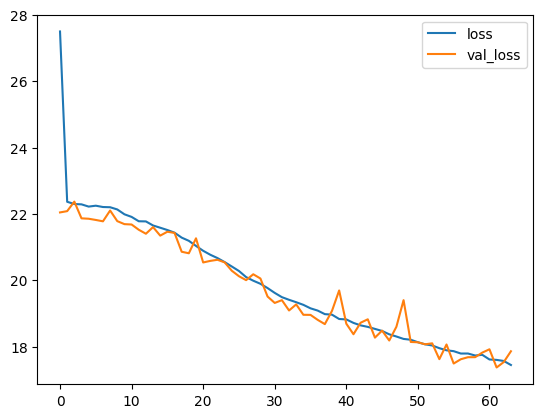

In [37]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


18.351308751121945

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output: 
        clear_output()  # Clear the previous output

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = batsman_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


NameError: name 'df' is not defined

In [7]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


NameError: name 'predict_button' is not defined